# Task 4

In [ ]:
import torchvision
import torch
import numpy as np
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import time
import pandas as pd
import torchvision.datasets as datasets
from IPython import display
import matplotlib.pyplot as plt

# Dataset Loading & Processing

Load dataset and split the data into training set and validation set. DataLoader in torch.utils are used for loading therequired data bypassing various parameters, (e.g. batch size).
Referenced: https://www.kaggle.com/lonnieqin/cifar10-image-classification-with-pytorch

In [2]:
batch_size = 64
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_ds = DataLoader(datasets.CIFAR10("data", train=True, transform=transform, download=True), batch_size=batch_size)
valid_ds = DataLoader(datasets.CIFAR10("data", train=False, transform=transform, download=True), batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


# Implement Neural Networks
Apply a simple neural network by PyTorch for classification

In [3]:
# Setting a regular neural network for classfication 
class Neural_Network():
    def __init__(self):
        classifier = nn.Sequential(
            nn.Dropout(),                           # implement Dropuout 
            nn.Linear(256 * 6 * 6, 1024),            # Input size is equal to number of output from final convolution time the size of average pooling
            nn.ReLU(),                              # Apply ReLu activation funciton
            nn.Dropout(),
            nn.Linear(1024, 512),                   # the input to the linear funcntion is the output from last layer
            nn.ReLU(),                               # Apply ReLu activation funciton
            nn.Linear(512, 10)             # get the final output with the size same as target value 
        )


##### Improvements for Neural Networkds( Convolution NN & Dropout) 

The Convolutional Neural Networks have three important Layers
- Convolutional Layer : Used to extract features from the image.
- Pooling Layer : The main goal of this layer is to reduce the convoluted size of the feature map and to reduce Computational costs.
- Activation Functions : These are used to learn and approximate any kind of continuous and complex relations between variables of the network.


Dropout is applied to improvce generalization error and reduce overfitting problem.


Referecnes:
- https://www.kaggle.com/lonnieqin/cifar10-image-classification-with-pytorch
-https://www.analyticsvidhya.com/blog/2021/09/convolutional-neural-network-pytorch-implementation-on-cifar10-dataset/


In [ ]:
class CNN(nn.Module):
    
    def __init__(self, no_class):
        super(CNN, self).__init__()                  # Setting the initial parameter
        self.convolution = nn.Sequential(                           # Import Neural Network module from torch
# Define first 2D convolution layer
            nn.Conv2d(3, 64, kernel_size=3, padding=2),     # Applies a 2D convolution form input image
            # create 3 channels in the import image, as 3 direct to the colored image and in RBG format and produce 64 output chanel by Convolution, 
            # the size of convolving kernel is 3 with replicate padding mode
            nn.ReLU(),                                      # Apply ReLu activation funciton
            nn.MaxPool2d(kernel_size=3, stride=2),          # Applies a 2D max pooling over an input signal composed of several input planes.
# Define Second 2D convolution layer            
            nn.Conv2d(64, 128, kernel_size=5, padding=2),         # Applies a 2D convolution over an input signal composed of several input planes.
           # the input size is same as the previous convolution output, the output size is set to be 2 times larger 
            nn.ReLU(),                                           # Apply ReLu activation funciton
            nn.MaxPool2d(kernel_size=3, stride=2),
# Define Third 2D convolution layer            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),                                        
# Define Fourth 2D convolution layer 
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),                                       
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.average_pool = nn.AdaptiveAvgPool2d((6, 6))         # To creat a average pooling to input signal from several input planes  
        
        # apply a classifier to faltten the layer to bulid a linear layer to map the values to 10 target values
        # Which is help to determine the class
        self.classifier = nn.Sequential(
            nn.Dropout(),                           # implement Dropuout 
            nn.Linear(256 * 6 * 6, 1024),            # Input size is equal to number of output from final convolution time the size of average pooling
            nn.ReLU(),                              # Apply ReLu activation funciton
            nn.Dropout(),
            nn.Linear(1024, 512),                   # the input to the linear funcntion is the output from last layer
            nn.ReLU(),                               # Apply ReLu activation funciton
            nn.Linear(512, no_class)             # get the final output with the size same as target value 
        )
    
    def forward(self, x):                 # Define the forward, where x is the input image
        x = self.convolution(x)              # calculate the convolution of input image
        x = self.average_pool(x)                # average the polling from output of convolution
        x = torch.flatten(x, start_dim =1)            # faltten the output of average poiling to array
        x = self.classifier(x)                       # Using normal neural network to calculate the output where input is from convolution 
        return x

Implement final model for Convolution Neural Network to this machine learning problme which have 10 features.

In [4]:
model = CNN(no_class=10)

CNNModel(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=4096, out_features=4096, bias=True)
    (5): ReLU()
    (6): Linear(in_fea

# Training 
Create a basic step to train the CNN been build and to get the required output. For loop is created for iterate the mode over each epoch. The progressing using CPU for each batch are setted. The backward function is requied to add in each iteration in order to update optimum parameter values.
Reference:
- https://www.analyticsvidhya.com/blog/2021/09/convolutional-neural-network-pytorch-implementation-on-cifar10-dataset/
- https://www.kaggle.com/lonnieqin/cifar10-image-classification-with-pytorch
- https://d2l.ai/chapter_computer-vision/kaggle-cifar10.html
- https://www.cs.toronto.edu/~lczhang/aps360_20191/lec/w03/convnet.html

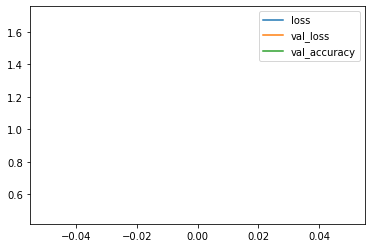

Epoch 2: [Training] 1523.95s/7944.84s


In [ ]:
# Define a funciton to disply the the results of training and testing 
# Code Reference: https://www.kaggle.com/samanemami/convolutional-nn-cifar10-79-acc-138-sec
def display_resultes(message, metrics):
    display.clear_output(wait=False) 
    if len(metrics["loss"]) > 0:
        pd.DataFrame(metrics).plot()   
        plt.show()
    print(message)

epochs = 10
train_steps = len(train_data)
valid_steps = len(validation_data)
optimizer = optim.Adam(model.parameters(), learning_rate=0.001)        # input a Adam optimizer with learnign rate 0.001
loss_CEL = torch.nn.CrossEntropyLoss()                                  # Input cross entropy loss function for loss calculation
metrics = {"loss": [], "val_loss": [], "val_accuracy": []}             # Create a matrix to store loss, validation loss and validation accuracy
device = torch.device("cpu")                                          # Selecting CPU to do the calculation
model.to(device)
for epoch in range(epochs):
    train_losses = []           # Create a marray to store the resultes of train loss
    valid_losses = []           # Create a marray to store the resultes of validation loss      
    model.train()               

# Developing a for loop iteration to train the dataset
    for batch in train_data:
        inputs, targets = batch              
        inputs = inputs.to(device)         # using cpu to import input value
        targets = targets.to(device)       # using cpu to import target label
        output = model(inputs)             # using the input value from training set and CNN to calculate results 
        loss = loss_CEL(output, targets)  # calculate the loss between predict value and target value
        train_losses.append(loss.data.item())  # Store the train loss into the dataframe
        loss.backward()                    # apply backward funciton to loss, in order to find the gradient of output values and parameters  
        optimizer.step()                   #  performs a parameter update based on the current gradient and the update rule 
        optimizer.zero_grad()               # call the optimizer.zero_grad to store the gradient of each parameter after backward function
        

# Developing a for loop iteration to test the dataset
    no_correct = 0
    no_samples = 0
    for batch in validation_data:
        optimizer.zero_grad()
        inputs, targets = batch
        inputs = inputs.to(device)          # using cpu to import input value
        targets = targets.to(device)        # using cpu to import target label
        output = model(inputs)             # using the input value from validation set and CNN to calculate results 
        loss = loss_CEL(output, targets)     # calculate the loss between predict value and target value
        valid_losses.append(loss.data.item())    # Store the testing loss into the dataframe
        
        correct_prediciton = torch.eq(torch.max(F.softmax(output), dim=1)[1], targets).view(-1)   # input softmax function to determining the accurancy of the prediction
        no_correct += torch.sum(correct_prediciton).item()       # calculate all the number of correct prediction
        no_samples += correct_prediciton.shape[0]                # number of sample  

# Evaluation to the CNN performance 
    train_loss = torch.mean(torch.Tensor(train_losses)).item()   # function to add up the trainig loss and store the value into matrix 
    valid_loss = torch.mean(torch.Tensor(valid_losses)).item()   # function to add up the validation loss and store the value into matrix 
    accuracy = no_correct / no_samples if no_samples > 0 else 0    # function to calculate overall performance of CNN
    metrics["loss"].append(train_loss)                       # store all the loss value into blank matrix created before
    metrics["val_loss"].append(valid_loss)                 # store all the validation loss value into blank matrix created before
    metrics["val_accuracy"].append(accuracy)                # store all the accuracy value into blank matrix created before
    display.clear_output(wait=False) 
    pd.DataFrame(metrics).plot()                            # plot the results 
    plt.show()
    display_resultes(
        "Training Loss: %.2f Validation Loss: %.2f accuracy: %.2f" %(train_loss, valid_loss, accuracy), 
        metrics
    )